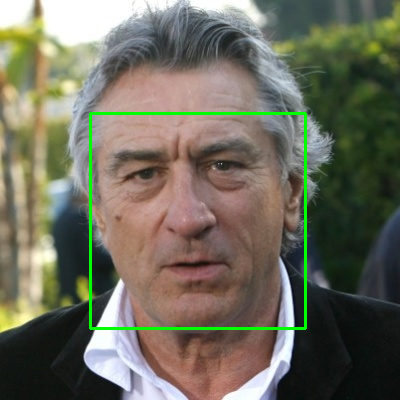

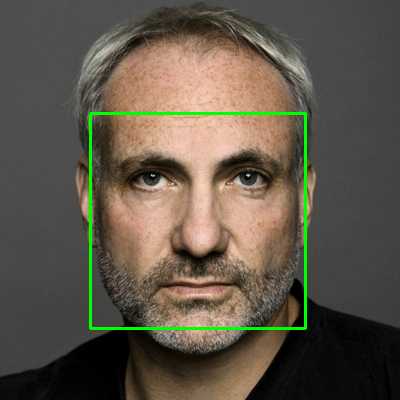

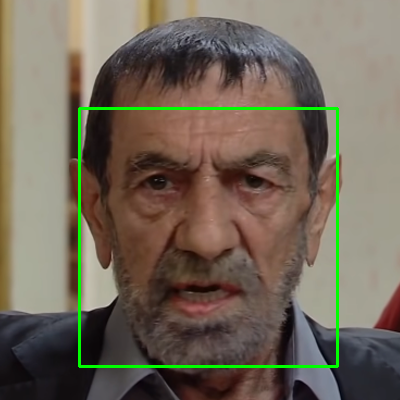

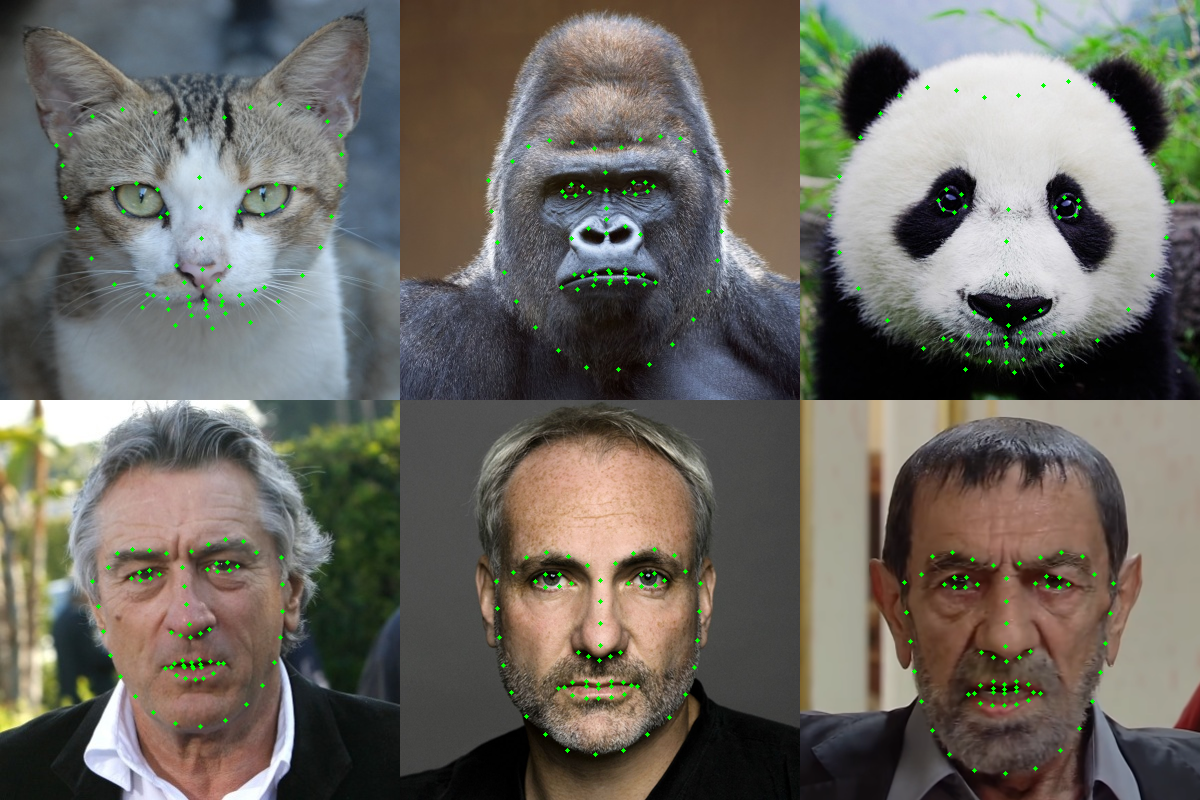

In [1]:
#Erhan Önal 150170713
################################   PART 1    #########################################
import dlib
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
humans = []
animals = []
humanPoints = []
animalPoints = []
image = cv2.imread("deniro.jpg")
humans.append(image)
image = cv2.imread("kimbodnia.png")
humans.append(image)
image = cv2.imread("aydemirakbas.png")
humans.append(image)

image = cv2.imread("cat.jpg")
animals.append(image)
image = cv2.imread("gorilla.jpg")
animals.append(image)
image = cv2.imread("panda.jpg")
animals.append(image)

points = np.load("cat_landmarks.npy")
animalPoints.append(points)
points = np.load("gorilla_landmarks.npy")
animalPoints.append(points)
points = np.load("panda_landmarks.npy")
animalPoints.append(points)

green = (0, 255, 0)


for image in humans:
    
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rectangles = detector(gray)
  rectCount = 0
  for rect in rectangles:
    rectCount += 1

  if rectCount == 1:
    topLeft =  (int(rectangles[0].tl_corner().x), int( rectangles[0].tl_corner().y))
    bottomRight = (int(rectangles[0].br_corner().x), int(rectangles[0].br_corner().y))
    image_withRect = image.copy()
    image_withRect = cv2.rectangle(image_withRect, topLeft, bottomRight , color = green , thickness = 2) 
    cv2_imshow(image_withRect)
    points = predictor(gray, rectangles[0])
    point_np = np.zeros_like(animalPoints[0])
    for i in range(68):
      point_np[i] = [points.part(i).x, points.part(i).y]
    humanPoints.append(point_np) 
  else:
    print("Wrong Rectangle Count")



animalsPointed = []
for image, points in zip(animals, animalPoints):
    image_withPoints = image.copy()
    for i in range(68):
      point = (points[i, 0], points[i, 1])
      image_withPoints = cv2.circle(image_withPoints, point, radius=2, color = green, thickness = -1)
    animalsPointed.append(image_withPoints)

humansPointed = []
for image, points in zip(humans, humanPoints):
    image_withPoints = image.copy()
    for i in range(68):
      point = (points[i, 0], points[i, 1])
      image_withPoints = cv2.circle(image_withPoints, point, radius=2, color = green, thickness = -1)
    humansPointed.append(image_withPoints)

animalsStack = np.hstack(animalsPointed)
humansStack = np.hstack(humansPointed)
cv2_imshow(np.vstack((animalsStack, humansStack)))





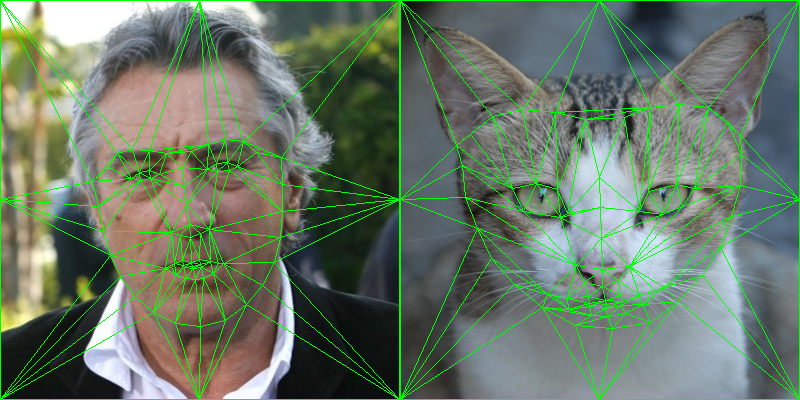

In [2]:
################################   PART 2    #########################################
####################### Select Images #############################################
############### humans ----- 0: deniro - 1: kimbodnia - 2: aydemirakbas
############### animals ---- 0: cat    - 1: gorilla   - 3: panda  
image1 = humans[0]
points1 = humanPoints[0]
image2 = animals[0]
points2 = animalPoints[0]
#######################################################################################
subdiv = cv2.Subdiv2D((0, 0, image1.shape[0], image1.shape[1]))

for i in range(68):
  point = (points1[i, 0], points1[i, 1])
  subdiv.insert(point)
subdiv.insert((0, 0))
subdiv.insert((0, image1.shape[1] / 2 - 1))
subdiv.insert((0, image1.shape[1] - 1))
subdiv.insert((image1.shape[0] - 1, 0))
subdiv.insert((image1.shape[0] - 1, image1.shape[1] / 2 - 1))
subdiv.insert((image1.shape[0] - 1, image1.shape[1] - 1))
subdiv.insert((image1.shape[0] / 2 - 1, image1.shape[1] - 1))
subdiv.insert((image1.shape[0] / 2 - 1, 0))


pointsExtended1 = np.zeros((76,2), int)


for i in range(68):
  pointsExtended1[i] = points1[i]
pointsExtended1[68] = (0, 0)
pointsExtended1[69] = (0, image1.shape[1] / 2 - 1) 
pointsExtended1[70] = (0, image1.shape[1] - 1)
pointsExtended1[71] = (image1.shape[0] - 1, 0)
pointsExtended1[72] = (image1.shape[0] - 1, image1.shape[1] / 2 - 1)
pointsExtended1[73] = (image1.shape[0] - 1, image1.shape[1] - 1)
pointsExtended1[74] = (image1.shape[0] / 2 - 1, image1.shape[1] - 1)
pointsExtended1[75] = (image1.shape[0] / 2 - 1, 0)


triangles1 = subdiv.getTriangleList()
#print("trishape: " +  str(triangles1.shape[0]))
ids = []
for tri in triangles1:
    result = []
    for i in range(0, 6, 2):
      
      point = [tri[i] , tri[i + 1]]
    #  print("Point Searched: " + str(int(point[0])) +" " +str(int(point[1])))
      index = np.argwhere(pointsExtended1 == point)
    #  print("locations")
    #  print(index)

      for loc in index:
        if np.count_nonzero(loc[0] == index[:, 0]) == 2:
          if loc[0] not in result:
            result.append(loc[0])
   # print("result")
   # print(result)
    #print("val")
    #print(pointsExtended1[result])
    ids.append(result)
#print("idlend: " + str(len(ids))) 
#print(ids[0][1])

pointsExtended2 = np.zeros((76,2), int)

for i in range(68):
  pointsExtended2[i] = points2[i]
pointsExtended2[68] = (0, 0)
pointsExtended2[69] = (0, image2.shape[1] / 2 - 1) 
pointsExtended2[70] = (0, image2.shape[1] - 1)
pointsExtended2[71] = (image2.shape[0] - 1, 0)
pointsExtended2[72] = (image2.shape[0] - 1, image2.shape[1] / 2 - 1)
pointsExtended2[73] = (image2.shape[0] - 1, image2.shape[1] - 1)
pointsExtended2[74] = (image2.shape[0] / 2 - 1, image2.shape[1]  - 1)
pointsExtended2[75] = (image2.shape[0] / 2 - 1, 0)

triangles2 = np.zeros_like(triangles1)
for i in range(triangles2.shape[0]):
    triangles2[i, 0] = pointsExtended2[ids[i][0]][0]
    triangles2[i, 1] = pointsExtended2[ids[i][0]][1]

    triangles2[i, 2] = pointsExtended2[ids[i][1]][0]
    triangles2[i, 3] = pointsExtended2[ids[i][1]][1]
    
    triangles2[i, 4] = pointsExtended2[ids[i][2]][0]
    triangles2[i, 5] = pointsExtended2[ids[i][2]][1]



image1_withTriangles = image1.copy()
for tri in triangles1:
  point1 = (tri[0], tri[1])
  point2 = (tri[2], tri[3])
  point3 = (tri[4], tri[5])

  image1_withTriangles = cv2.line(image1_withTriangles, point1, point2, green, 1)
  image1_withTriangles = cv2.line(image1_withTriangles, point2, point3, green, 1)
  image1_withTriangles = cv2.line(image1_withTriangles, point1, point3, green, 1)
#cv2_imshow(image1_withTriangles)


image2_withTriangles = image2.copy()
for tri in triangles2:
  point1 = (tri[0], tri[1])
  point2 = (tri[2], tri[3])
  point3 = (tri[4], tri[5])

  image2_withTriangles = cv2.line(image2_withTriangles, point1, point2, green, 1)
  image2_withTriangles = cv2.line(image2_withTriangles, point2, point3, green, 1)
  image2_withTriangles = cv2.line(image2_withTriangles, point1, point3, green, 1)
#cv2_imshow(image2_withTriangles)

cv2_imshow(np.hstack((image1_withTriangles, image2_withTriangles)))



In [3]:
################################   PART 3    #########################################
def make_homogeneous(triangle):
  homogeneous = np.array([triangle[::2], \
                          triangle[1::2], \
                          [1, 1, 1]]) #(C)
  return homogeneous

def calc_transform(triangle1, triangle2):
  source = make_homogeneous(triangle1).T #(3,3)
  target = triangle2
  Mtx = np.array([np.concatenate((source[0], np.zeros(3))),
                  np.concatenate((np.zeros(3), source[0])),
                  np.concatenate((source[1], np.zeros(3))),
                  np.concatenate((np.zeros(3), source[1])),
                  np.concatenate((source[2], np.zeros(3))),
                  np.concatenate((np.zeros(3), source[2]))])#(D)
  coefs = np.matmul(np.linalg.pinv(Mtx), target)#(E)
  Transform = np.array([coefs[:3], coefs[3:], [0, 0, 1]])#(F)
  return Transform

def vectorised_Bilinear(coordinates, target_img, size):
  coordinates[0] = np.clip(coordinates[0], 0, size[0]-1)
  coordinates[1] = np.clip(coordinates[1], 0, size[1]-1)
  lower = np.floor(coordinates).astype(np.uint32)
  upper = np.ceil(coordinates).astype(np.uint32)

  error = coordinates - lower
  resindual = 1-error

  top_left = np.multiply(np.multiply(resindual[0], resindual[1]).reshape(coordinates.shape[1], 1), target_img[lower[0], lower[1], :])
  top_right = np.multiply(np.multiply(resindual[0], error[1]).reshape(coordinates.shape[1], 1), target_img[lower[0], upper[1], :])
  bot_left = np.multiply(np.multiply(error[0], resindual[1]).reshape(coordinates.shape[1], 1), target_img[upper[0], lower[1], :])
  bot_right = np.multiply(np.multiply(error[0], error[1]).reshape(coordinates.shape[1], 1), target_img[upper[0], upper[1], :]) #(G)

  return np.uint8(np.round(top_left + top_right + bot_left + bot_right)) #(H)

def image_morph(image1, image2, triangles1, triangles2, transforms, t):
  inter_image_1 = np.zeros(image1.shape).astype(np.uint8)
  inter_image_2 = np.zeros(image2.shape).astype(np.uint8)

  for i in range(len(transforms)):
    homo_inter_tri = (1-t)*make_homogeneous(triangles1[i]) + t*make_homogeneous(triangles2[i]) #(I)

    polygon_mask = np.zeros(image1.shape[:2], dtype=np.uint8)
    cv2.fillPoly(polygon_mask, [np.int32(np.round(homo_inter_tri[1::-1,:].T))], color=255) #(J)
    
    seg = np.where(polygon_mask == 255)#(K)
    
    mask_points = np.vstack((seg[0], seg[1], np.ones(len(seg[0]))))#(L)
    
    inter_tri = homo_inter_tri[:2].flatten(order="F")#(M)
    
    inter_to_img1 = calc_transform(inter_tri, triangles1[i])
    inter_to_img2 = calc_transform(inter_tri, triangles2[i])
    
    mapped_to_img1 = np.matmul(inter_to_img1, mask_points)[:-1]#(N)
    mapped_to_img2 = np.matmul(inter_to_img2, mask_points)[:-1]
    
    inter_image_1[seg[0], seg[1], :] = vectorised_Bilinear(mapped_to_img1, image1, inter_image_1.shape)#(O)
    inter_image_2[seg[0], seg[1], :] = vectorised_Bilinear(mapped_to_img2, image2, inter_image_2.shape)

  result = (1-t)*inter_image_1 + t*inter_image_2 #(P)

  return result.astype(np.uint8)

img1_triangles = triangles1[:, [1, 0, 3, 2, 5, 4]]
img2_triangles = triangles2[:, [1, 0, 3, 2, 5, 4]]

Transforms = np.zeros((len(img1_triangles), 3, 3))
for i in range(len(img1_triangles)):
  source = img1_triangles[i]
  target = img2_triangles[i]
  Transforms[i] = calc_transform(source, target) #(A)

morphs = []
for t in np.arange(0, 1.0001, 0.02): #(B)
  print("processing:\t", int(t*100), "%")
  morphs.append(image_morph(image1, image2, img1_triangles, img2_triangles, Transforms, t)[:, :, [2, 1,0]])


import moviepy.editor as mpy
clip = mpy.ImageSequenceClip(morphs, fps = 25)
clip.write_videofile('morph.mp4', codec = 'libx264')

processing:	 0 %
processing:	 2 %
processing:	 4 %
processing:	 6 %
processing:	 8 %
processing:	 10 %
processing:	 12 %
processing:	 14 %
processing:	 16 %
processing:	 18 %
processing:	 20 %
processing:	 22 %
processing:	 24 %
processing:	 26 %
processing:	 28 %
processing:	 30 %
processing:	 32 %
processing:	 34 %
processing:	 36 %
processing:	 38 %
processing:	 40 %
processing:	 42 %
processing:	 44 %
processing:	 46 %
processing:	 48 %
processing:	 50 %
processing:	 52 %
processing:	 54 %
processing:	 56 %
processing:	 57 %
processing:	 60 %
processing:	 62 %
processing:	 64 %
processing:	 66 %
processing:	 68 %
processing:	 70 %
processing:	 72 %
processing:	 74 %
processing:	 76 %
processing:	 78 %
processing:	 80 %
processing:	 82 %
processing:	 84 %
processing:	 86 %
processing:	 88 %
processing:	 90 %
processing:	 92 %
processing:	 94 %
processing:	 96 %
processing:	 98 %
processing:	 100 %
Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
T

100%|██████████| 52/52 [00:00<00:00, 153.84it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: morph.mp4 

